In [44]:
import awkward as ak
import hist
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from coffea.analysis_tools import PackedSelection
import numpy as np
import mplhep as hep
import matplotlib.pyplot as plt

In [45]:
filename = "/home/prayag/Coffea/data/3BF5BC57-5D24-1C4D-B277-7B0BAA5DF3C7.root"
events = NanoEventsFactory.from_root(
    filename,
    schemaclass=NanoAODSchema.v7
).events()

In [46]:
sel = PackedSelection()
sel.add("anyloose", ak.any(events.Electron.cutBased == 2, axis=1 )) 
sel.add("veto", ak.any(events.Electron.cutBased == 1, axis=1 ))

In [47]:
comphist = hist.Hist.new.StrCat(["anyloose","veto"], name="mode").Regular(25,0,100, name="pt").Double()

In [48]:
loose = events[sel.all("anyloose")]
veto = events[sel.all("veto")]
comphist.fill(mode="anyloose", pt = ak.flatten(loose.Electron.pt ))
comphist.fill(mode="veto", pt = ak.flatten(veto.Electron.pt ))

Hist(
  StrCategory(['anyloose', 'veto'], name='mode'),
  Regular(25, 0, 100, name='pt'),
  storage=Double()) # Sum: 56359.0 (61600.0 with flow)

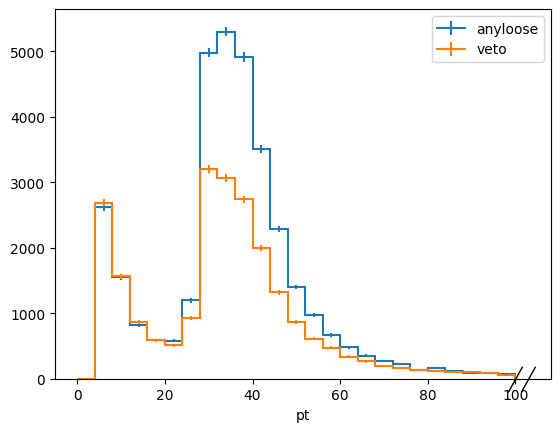

In [49]:
fig, ax = plt.subplots()
hep.histplot(
    [comphist["anyloose",:],comphist["veto",:]],
    label=["anyloose","veto"],
    ax=ax
)
ax.legend()

In [50]:
print("Total events: ", len(events))
print("Events which have at least one loose electron (x) = ", len(loose))
print("Events where electrons are vetoed out (y) = ", len(veto))
print("x+y = ", len(loose)+len(veto))

Total events:  297347
Events which have at least one loose electron (x) =  26860
Events where electrons are vetoed out (y) =  18483
x+y =  45343


In [51]:
from coffea import util
from monoHbbtools.Utilities import get_timestamp, normalize
from monoHbbtools.Load import crossSections

In [52]:
Output = util.load("BackgroundDijets.coffea")

Ratio:  1.029993980602151 
Factor:  35261435.3
ratio * factor =  36319066.1063922


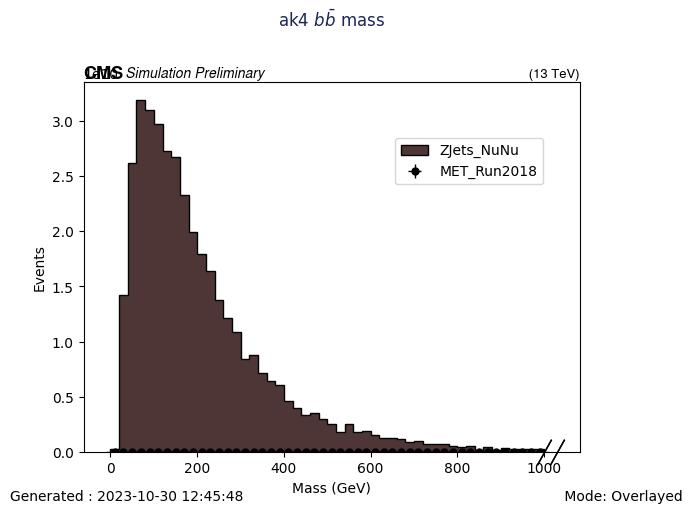

In [53]:

Data_hist = Output["MET_Run2018"]["Histograms"]["DiJet"]
Zjets_hist = Output["ZJets_NuNu"]["Histograms"]["DiJet"]



Integrated_Luminosity = crossSections.lumis[2018] 

xsec_Z1Jets_ZpT_50To150 = crossSections.crossSections["Z1Jets_NuNu_ZpT_50To150_18"]
xsec_Z1Jets_ZpT_150to250 = crossSections.crossSections["Z1Jets_NuNu_ZpT_150To250_18"]
xsec_Z1Jets_ZpT_250to400 = crossSections.crossSections["Z1Jets_NuNu_ZpT_250To400_18"]
xsec_Z1Jets_ZpT_400toinf =crossSections.crossSections["Z1Jets_NuNu_ZpT_400Toinf_18"]
xsec_Z2Jets_ZpT_50To150 = crossSections.crossSections["Z2Jets_NuNu_ZpT_50To150_18"]
xsec_Z2Jets_ZpT_150to250 = crossSections.crossSections["Z2Jets_NuNu_ZpT_150To250_18"]
xsec_Z2Jets_ZpT_250to400 = crossSections.crossSections["Z2Jets_NuNu_ZpT_250To400_18"]
xsec_ZJets_ZpT_400toinf = crossSections.crossSections["Z2Jets_NuNu_ZpT_400Toinf_18"]


ratio = (Output["ZJets_NuNu"]["Cutflow"]["Total_Events"] / Output["MET_Run2018"]["Cutflow"]["Total_Events"] )
factor = Integrated_Luminosity * xsec_Z1Jets_ZpT_50To150
print("Ratio: ", ratio ,"\nFactor: " , factor)
print("ratio * factor = ", ratio * factor)
Zjets_hist = Zjets_hist * factor * ratio

fig, ax = plt.subplots()
hep.histplot(
    Zjets_hist,
    histtype="fill",
    color="#4E3636",
    #marker=[],
    label="ZJets_NuNu",
    edgecolor="black",
    lw=1,
    ax=ax
    )
hep.histplot(
    Data_hist ,
    histtype='errorbar',
    yerr=0,
    xerr=20,
    color="black",
    marker='o',
    markersize=5,
    linestyle="None",
    label="MET_Run2018",
    #edgecolor="black",
    lw=0,
    ax=ax
    )
# Measured data
# ax.errorbar(
#    center,
#    hist,
#    xerr=xerrs,
#    yerr=yerrs,
#    linestyle="None",
#   color="black",
#    marker="o",
#    label="Data"
# )

hep.cms.label("Preliminary", data= False)
ax.set_ylabel("Events")
ax.set_xlabel("Mass (GeV)")
#ax.set_yscale("log")
ax.set_title(r"ak4 $b \bar{b}$ mass",pad=40, color="#192655")
fig.text(0.01,0.01,"Generated : "+get_timestamp(), fontsize = "10")
fig.text(0.87,0.01," Mode: Overlayed", fontsize = "10")
fig.legend(loc= (0.57,0.64))

In [54]:
events.run[0]

302448

In [55]:
List = [1,4,4,3,2]
Set= set({})
for entry in List :
    Set.add(entry)
print(Set)

{1, 2, 3, 4}


In [56]:
fast_set = set(List)
fast_set

{1, 2, 3, 4}

In [57]:
awk_List = ak.Array(List)
test_set = set(awk_List)
test_set

{1, 2, 3, 4}

In [58]:
a = set(events.run)
a

{302448}

In [59]:
b = {i for i in range(9)}
b

{0, 1, 2, 3, 4, 5, 6, 7, 8}

In [60]:
for i in b :
    a.add(i)
a

{0, 1, 2, 3, 4, 5, 6, 7, 8, 302448}